# Convergence Analysis for Newton-Raphson Methods

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Know what properties of a function and what user interactions can slow the convergence of Newton's Method to the solution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Examples of slow convergence

Newton's method, including its inexact variant, and the secant method can both converge slowly in the presence of the following:
* Multiple roots or closely spaced roots
* Complex roots
* Bad initial guess (we saw this one already in the example in the [Newton-Raphson Method notebook](../04-publish/02-Newton-Raphson-Method-in-One-Dimension.ipynb) where the guesses went the wrong way at first)

## Example 1: Multiple Roots, overlapping

The function 

$$f(x) = x^7$$ 

has multiple roots at 0. Let's see how it converges with Newton.

Notice I switch from $c(x) = 0$ to $f(x) = 0$. People use them interchangeably for canonical form.

First, run the Newton's Method cell below that we used in the [Newton-Raphson Method notebook](../04-publish/02-Newton-Raphson-Method-in-One-Dimension.ipynb):

In [2]:
def newton(f,fprime,x0,epsilon=1.0e-6, LOUD=False, max_iter=50):
    """Find the root of the function f(x) via Newton-Raphson method
    Args:
        f: the function, in canoncial form, we want to fix the root of [Python function]
        fprime: the derivative of f [Python function]
        x0: initial guess [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert callable(fprime), "Warning: 'fprime' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",f(x),"/",
                  fprime(x),"=",x - f(x)/fprime(x))
        
        # add general single-variable Newton's Method equation below
        # Add your solution here
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
        
        iterations += 1 
    print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

Now, let's see how Newton's Method reacts:

In [3]:
# define function
mult_root = lambda x: 1.0*x**7

# define first derivative
Dmult_root = lambda x: 7.0*x**6

# solve with Newton's method
root = newton(mult_root,Dmult_root,1.0,epsilon=1.0e-12,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 1.0 / 7.0 = 0.8571428571428572
x_ 2 = 0.8571428571428572 - 0.33991667708911394 / 2.7759861962277634 = 0.7346938775510204
x_ 3 = 0.7346938775510204 - 0.11554334736330486 / 1.1008713373781547 = 0.6297376093294461
x_ 4 = 0.6297376093294461 - 0.03927511069548781 / 0.43657194805493627 = 0.5397750937109538
x_ 5 = 0.5397750937109538 - 0.013350265119917321 / 0.1731311002086809 = 0.4626643660379604
x_ 6 = 0.4626643660379604 - 0.004537977757820996 / 0.0686585063310034 = 0.3965694566039661
x_ 7 = 0.3965694566039661 - 0.0015425343201428206 / 0.027227866546925984 = 0.3399166770891138
x_ 8 = 0.3399166770891138 - 0.0005243331403988625 / 0.01079774024099974 = 0.29135715179066896
x_ 9 = 0.29135715179066896 - 0.00017822957877208114 / 0.004282053979924045 = 0.2497347015348591
x_ 10 = 0.2497347015348591 - 6.058320617519827e-05 / 0.0016981318199673287 = 0.2140583156013078
x_ 11 = 0.2140583156013078 - 2.0593242130478076e-05 / 0.0006734272130863475 = 0.18347855622969242
x_ 12 = 0.183478

## Example 2: Multiple roots, spaced far apart

Now consider

$$f(x) = \sin(x),$$

which has multiple roots that are spaced far apart. We'll see Newton's method converge fast in this case.

In [4]:
# define function
mult_root = lambda x: np.sin(x)

# define derivative
Dmult_root = lambda x: np.cos(x)

# call Newton's method
root = newton(mult_root,Dmult_root,1.0,LOUD=True, epsilon=1e-12)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 0.8414709848078965 / 0.5403023058681398 = -0.5574077246549021
x_ 2 = -0.5574077246549021 - -0.5289880970896319 / 0.8486292436261492 = 0.06593645192484066
x_ 3 = 0.06593645192484066 - 0.06588868458420974 / 0.9978269796130803 = -9.572191932508134e-05
x_ 4 = -9.572191932508134e-05 - -9.572191917890302e-05 / 0.999999995418657 = 2.923566201412306e-13
It took 4 iterations
The root estimate is 2.923566201412306e-13 
f( 2.923566201412306e-13 ) = 2.923566201412306e-13


## Example 3: Complex roots near the real root

For the case of complex roots let's consider a function that has complex roots near the actual root.  One such function is 

$$ f(x) = x(x-1)(x-3) + 3.$$

The derivative of this function is 

$$ f'(x) =3x^3 - 8x  + 3.$$

The root is at $x= -0.546818$.

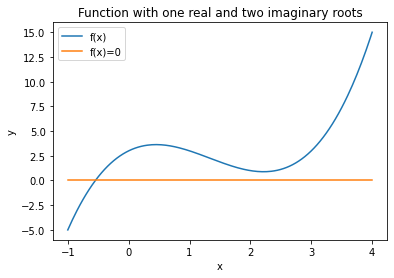

In [5]:
x = np.linspace(-1,4,200)
comp_root = lambda x: x*(x-1)*(x-3) + 3
d_comp_root = lambda x: 3*x**2 - 8*x + 3
plt.plot(x, comp_root(x),'-',label="f(x)")
plt.plot(x,0*x,label="f(x)=0")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function with one real and two imaginary roots")
plt.show()

In [6]:
root = newton(comp_root,d_comp_root,2.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 2.0
x_ 1 = 2.0 - 1.0 / -1.0 = 3.0
x_ 2 = 3.0 - 3.0 / 6.0 = 2.5
x_ 3 = 2.5 - 1.125 / 1.75 = 1.8571428571428572
x_ 4 = 1.8571428571428572 - 1.1807580174927113 / -1.5102040816326543 = 2.6389961389961383
x_ 5 = 2.6389961389961383 - 1.4385483817495095 / 2.780932752940469 = 2.1217062547914827
x_ 6 = 2.1217062547914827 - 0.9097213333636254 / -0.4687377434679618 = 4.062495845646789
x_ 7 = 4.062495845646789 - 16.218911005018263 / 20.01165072251795 = 3.2520224254422248
x_ 8 = 3.2520224254422248 - 4.845718347978311 / 8.71077016319959 = 2.69573196464577
x_ 9 = 2.69573196464577 - 1.6091181327603166 / 3.235056758472666 = 2.1983316861047486
x_ 10 = 2.1983316861047486 - 0.8881406969735082 / -0.08866688244154908 = 12.21493171215154
x_ 11 = 12.21493171215154 - 1265.3500398359906 / 352.89421650036365 = 8.629296185493123
x_ 12 = 8.629296185493123 - 373.6072839850617 / 157.35988848695354 = 6.255074345497114
x_ 13 = 6.255074345497114 - 109.99716055272572 / 70.33727043911153 = 4.691221215200477
x_ 14 = 

This converged slowly. This is because the complex roots at $x=2.2734\pm0.5638 i$ make the slope of the function change so that tangents don't necessarily point to a true root. 

We can see this graphically by looking at each iteration.

First, run the cell below with the nonlinear function from the [Newton-Raphson Method notebook](../04-publish/02-Newton-Raphson-Method-in-One-Dimension.ipynb) for us to analyze.

In [7]:
def nonlinear_function(x):
    ''' compute a nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c(x): scalar
    '''
    return 3*x**3 + 2*x**2 - 5*x-20

## Iteration 1

Initial Guess = 2


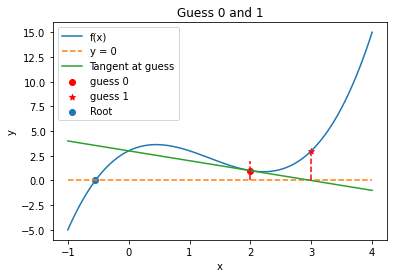

In [8]:
Np = 100
X = np.linspace(-1,4,Np)
plt.plot(X,comp_root(X),label="f(x)")
guess = 2
print("Initial Guess =",guess)
slope = d_comp_root(guess)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess 0",c="red")
new_guess = guess-comp_root(guess)/slope
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess 1",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

## Iteration 2

Guess 1 = 3.0
Guess 2 = 2.5


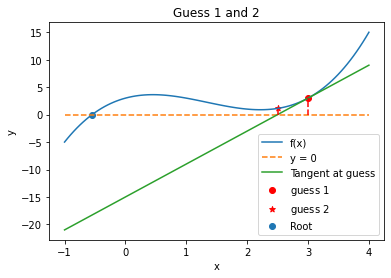

In [9]:
guess = new_guess
print("Guess 1 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $1$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $2$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

## Iteration 3

Guess 2 = 2.5
Guess 3 = 1.8571428571428572


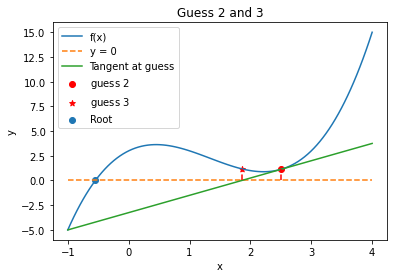

In [10]:
guess = new_guess
print("Guess 2 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $2$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $3$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

## Iteration 4

Guess 3 = 1.8571428571428572
Guess 4 = 2.6389961389961383


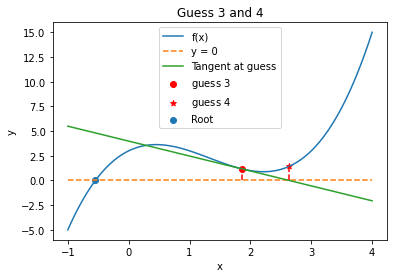

In [11]:
guess = new_guess
print("Guess 3 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $3$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 4 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $4$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 3 and 4")
plt.show()

Notice that the presence of the complex root causes the solution to oscillate around the local minimum of the function. Eventually, the method will converge on the root, but it takes many iterations to do so. The upside, however, is that it does eventually converge.